# RandomForestRegressor

In [1]:
import pandas as pd
import matplotlib. pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
from src.to_numerrical import *

In [6]:
train=pd.read_csv("./Output/train_GF.csv", index_col=0)
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,4,2,5,62.8,56.0,4.29,4.31,2.70,605
1,0.34,2,1,2,62.6,55.0,4.46,4.49,2.80,565
2,0.40,4,0,2,60.3,62.0,4.70,4.75,2.85,720
3,0.40,3,4,4,61.8,59.2,4.72,4.74,2.92,793
4,0.90,4,0,2,61.0,63.0,6.10,6.13,3.73,4381


,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.334386,0.446624,-0.112006,0.214227,0.234127,-0.206790,-0.408289,-0.393253,-0.375471,-0.265273
1,-0.321273,-0.179937,-0.312635,-0.354924,0.198182,-0.364711,-0.376218,-0.358924,-0.345477,-0.280506
2,-0.220757,0.369097,-0.401987,-0.280724,-0.265714,0.534524,-0.241306,-0.224517,-0.254729,-0.211640
3,-0.371020,0.190570,0.364472,0.041097,0.016481,0.345090,-0.397677,-0.381177,-0.384536,-0.347606
4,0.062168,0.401369,-0.437134,-0.305268,-0.149128,0.709108,0.094473,0.098527,0.077486,0.032440
...,...,...,...,...,...,...,...,...,...,...
40450,-0.342142,-0.183593,-0.518566,0.031544,-0.058434,-0.220455,-0.398982,-0.383891,-0.390725,-0.260935
40451,-0.334833,-0.172443,-0.487072,0.214513,-0.188420,-0.064612,-0.400313,-0.382710,-0.402903,-0.257235
40452,-0.339496,0.211689,0.116027,-0.524091,0.326933,0.119940,-0.332339,-0.316842,-0.288835,-0.369135
40453,-0.290736,-0.524202,0.081850,0.233162,0.424155,-0.225068,-0.323974,-0.310725,-0.272056,-0.271172


## Train_test_Split

In [24]:
X_train, X_test, y_train, y_test  = train_test_split(train.drop(columns="price"),train.price, test_size=0.2)

In [25]:
print(f"--------RandomForestRegressor--------")
model=RandomForestRegressor()
model=model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(f"RMSE->{mean_squared_error(y_predict,y_test)**0.5}")

--------RandomForestRegressor--------
RMSE->542.0489718109508


## GridSearchCV

In [28]:
parameters = { 
    'bootstrap': [True, False],
    'n_estimators': [100,200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [20,40,60]
}

## RandomForestRegressor

In [51]:
rfc = RandomForestRegressor()
grid = GridSearchCV(estimator=rfc,param_grid=parameters,verbose=1,n_jobs=-1,cv=5)
grid.fit(X_train,y_train)

In [22]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [50]:
model=RandomForestRegressor(bootstrap=True,max_depth=20,max_features="auto",n_estimators=200)
model=model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(f"RMSE->{mean_squared_error(y_predict,y_test)**0.5}")


RMSE->551.5081797165816


In [ ]:
y_test_predicted=grid.predict(X_test)

In [36]:
mean_squared_error(y_test,y_test_predicted)**0.5


551.7492857436873

In [37]:
r2_score(y_test,y_predict)

0.980110227189776

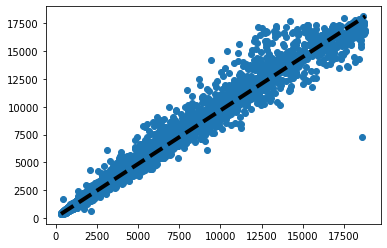

In [60]:
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()], [y_predict.min(), y_predict.max()], 'k--', lw=4)

In [ ]:
rfr_optimized=RandomForestRegressor(bootstrap=True, max_depth=20,max_features: 'auto',n_estimators: 200,)

In [38]:
predict=pd.read_csv("./Input/predict.csv", index_col=0)
predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [39]:
predict=make_it_numerical(predict)
predict.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,2.36,2,5,3,60.8,54.0,8.68,8.57,5.24
1,2.04,2,4,3,62.0,56.0,8.18,8.23,5.09
2,0.51,2,5,2,61.7,54.0,5.18,5.19,3.20
3,0.30,2,5,2,61.3,56.0,4.32,4.33,2.65
4,0.96,0,4,5,68.8,56.0,6.11,5.98,4.16


In [54]:
rfr_optimized.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [55]:
y_predicted_test_data=rfr_optimized.predict(predict)

In [40]:
y_predicted_test_data=model.predict(predict)

In [41]:
pd.DataFrame(y_predicted_test_data,columns=["price"]).to_csv("./Output/RFR_optimized.csv",index_label="id")

## ExtraTreesRegressor

In [42]:
print(f"--------ExtraTreesRegressor--------")
etr=ExtraTreesRegressor()
etr=etr.fit(X_train,y_train)
y_predict=etr.predict(X_test)
print(f"RMSE->{mean_squared_error(y_predict,y_test)**0.5}")
r2_score(y_test,y_predict)

--------ExtraTreesRegressor--------
RMSE->538.8468613308571


0.9813100493117224

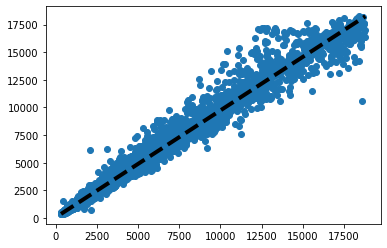

In [79]:
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()], [y_predict.min(), y_predict.max()], 'k--', lw=4)

In [67]:
params={"n_estimators":[100,150,250],
        "max_depth":[10,25,50],
        "min_samples_split":[5,10,20]
       }
GSCV=GridSearchCV(estimator=ExtraTreesRegressor(n_estimators=200,max_depth=50,min_samples_split=10,min_samples_leaf=1,random_state=300),
             scoring="neg_root_mean_squared_error",verbose=1,n_jobs=-1,param_grid=params,cv=5)

GSCV.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  7.8min finished


GridSearchCV(cv=5,
             estimator=ExtraTreesRegressor(max_depth=50, min_samples_split=10,
                                           n_estimators=200, random_state=300),
             n_jobs=-1,
             param_grid={'max_depth': [10, 25, 50],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 150, 250]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [69]:
GSCV.best_params_

{'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 100}

In [68]:
y_test_predict_opt=GSCV.predict(X_test)

RMSE=mean_squared_error(y_test,y_test_predict_opt)**0.5

R2=r2_score(y_test,y_test_predict_opt)

print(f"R2={R2}, RMSE={RMSE}")

R2=0.9810057181480413, RMSE=553.9078810424622


In [45]:
etr=ExtraTreesRegressor()
etr=etr.fit(X_train,y_train)
etr_predict=etr.predict(predict)


In [47]:
pd.DataFrame(y_predicted_test_data,columns=["price"]).to_csv("./Output/etr_optimized.csv",index_label="id")

# GradientBoosting

In [48]:
print(f"--------GradientBoostingRegressor--------")
GBR=GradientBoostingRegressor()
GBR=GBR.fit(X_train,y_train)
y_predict=GBR.predict(X_test)
print(f"RMSE->{mean_squared_error(y_predict,y_test)**0.5}")

--------GradientBoostingRegressor--------
RMSE->650.7718610238163


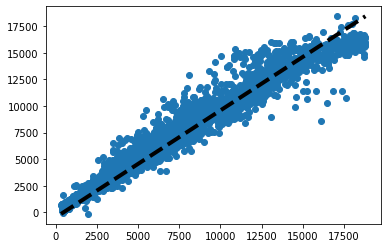

In [9]:
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()], [y_predict.min(), y_predict.max()], 'k--', lw=4)

In [49]:
GBR=GradientBoostingRegressor()
GBR=GBR.fit(X_train,y_train)
y_predict=GBR.predict(predict)
y_predict

array([15478.81899716, 15137.91095518,  1392.67577609, ...,
        2740.88098172,  1190.84954856,  2209.05684188])

In [77]:
pd.DataFrame(y_predicted_test_data,columns=["price"]).to_csv("./Output/GBR_optimized.csv",index_label="id")